In [191]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import wavfile
from scipy.signal import decimate
from comp28512_utils import Audio
from numpy import fft
from scipy.fftpack import dct
from scipy.fftpack import dct, idct
from tempfile import TemporaryFile as tf

def plotme(x,y,labelX,labelY,graphName):
    plt.plot(x,y)
    plt.title(graphName)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.show()
  
    
def sin(Fs, f, harmonics):
    T = 1.0/Fs
    x = np.arange(500)
    y = np.zeros(500)
    for k in range(1, harmonics):
        if (k%2) == 1:
            y += (1.0 / k) * np.sin(2 * np.pi *  f * k * T * x)
    return y
def cos(Fs, f,harmonics):
    T = 1.0/Fs
    x = np.arange(500)
    y = np.zeros(500)
    for k in range(1, harmonics):
        if (k%2) == 1:
            y += (1.0 / k*k) * np.cos(2 * np.pi *  f * k * T * x)
    return y

def sinPhase(Fs, f,harmonics):
    T = 1.0/Fs
    x = np.arange(500)
    y = np.zeros(500)
    for k in range(1, harmonics):
        if (k%2) == 1:
            if k == 3:
                y += (1.0 / k) * np.sin(2 * np.pi *  f * k * T * x + np.pi / 2)
            else:
                y += (1.0 / k) * np.sin(2 * np.pi *  f * k * T * x)
    return y

def makeFourier(audio, Fs):

    length = len(noise[1:501])
    x = np.arange(1,length+1)
    scaledT = length / float(Fs)
    fourierFrequency = x / scaledT
    Fourier = fft.fft(noise[1:501])
    
    return length, fourierFrequency, Fourier

# Task 2.1

##### Part a

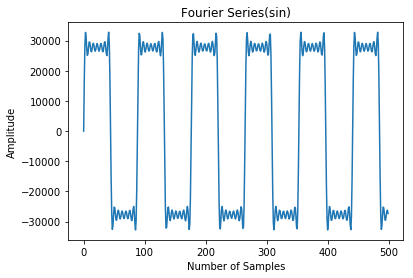

In [2]:
y = np.zeros(500)
x = np.arange(500)
y = sin(44100, 500, 15)
A = np.amax(np.absolute(y))
quant = np.round((y * (2**16 - 1) / 2) / A - 0.5)
intQ = np.int16(quant)
plotme(x,intQ,'Number of Samples','Amplitude','Fourier Series(sin)')

##### Part b

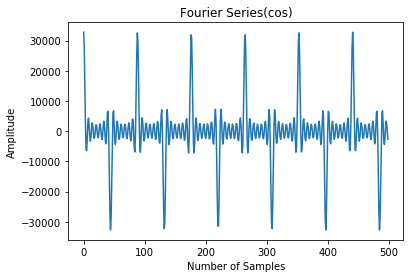

In [3]:
y = np.zeros(500)
x = np.arange(500)
y = cos(44100, 500, 15)
A = np.amax(np.absolute(y))
quant = np.round((y * (2**16 - 1) / 2) / A - 0.5)
intQ = np.int16(quant)
plotme(x,intQ,'Number of Samples','Amplitude','Fourier Series(cos)')

##### Part c

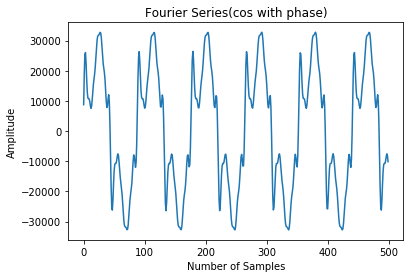

In [4]:
y = np.zeros(500)
x = np.arange(500)
y = sinPhase(44100, 500, 15)
A = np.amax(np.absolute(y))
quant = np.round((y * (2**16 - 1) / 2) / A - 0.5)
intQ = np.int16(quant)
plotme(x,intQ,'Number of Samples','Amplitude','Fourier Series(cos with phase)')

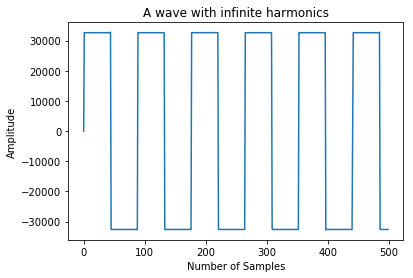

In [5]:
y = np.zeros(500)
x = np.arange(500)
y = sin(44100, 500, 10000)
A = np.amax(np.absolute(y))
quant = np.round((y * (2**16 - 1) / 2) / A - 0.5)
intQ = np.int16(quant)
plotme(x,intQ,'Number of Samples','Amplitude','A wave with infinite harmonics')

The first and the third waves are similar in the way that, when the harmonic is equal to three the amplitude is the same for both waveforms

# Task 2.2

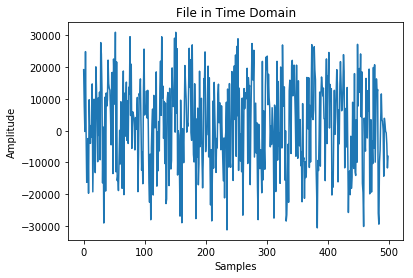

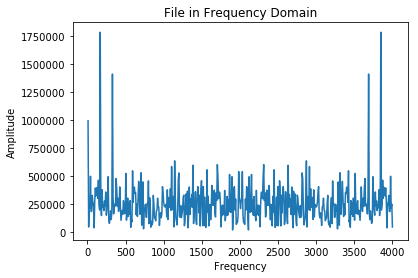

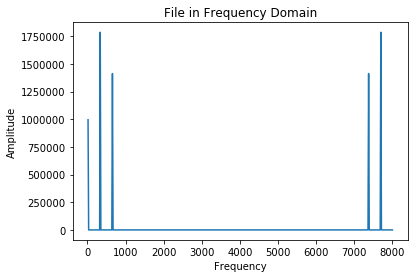

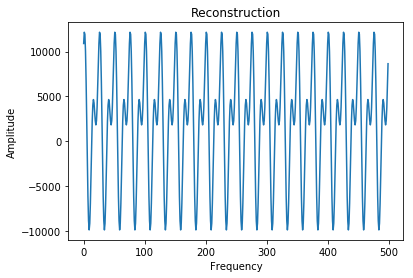

In [6]:
(Fs, noise) = wavfile.read("noisySinewave.wav")

x = np.arange(500)
plotme(x, noise[1:501],'Samples','Amplitude','File in Time Domain')

length,rate,Fourier = makeFourier(noise, Fs)

plotme(rate/2, np.abs(Fourier),'Frequency','Amplitude','File in Frequency Domain')

ModFourier = np.absolute(Fourier);

for i in range(0,500):
    if(ModFourier[i] <= 750000):
        Fourier[i] = 0
    
ModFourier = np.absolute(Fourier);
        
plotme(rate, ModFourier,'Frequency','Amplitude','File in Frequency Domain')

#y = makeInverseFourier(Fourier, length)
y = fft.ifft(Fourier)
y = np.real(y)
#x = np.arange(1,)
plotme(x, y,'Frequency','Amplitude','Reconstruction')

# Task 2.3

First we plot a sine wave in both time and frequency domains

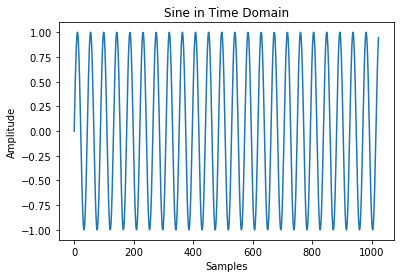

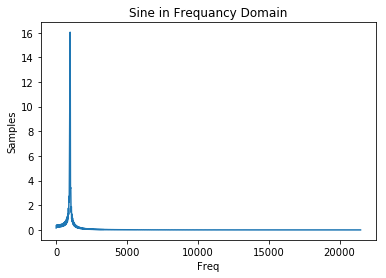

In [8]:
def scale16(input):
    input = input / np.amax(np.absolute(input))
    
    return np.round((input*(2**16 - 1)/2) -0.5)
x = np.arange(1024)

Fs = 44100
f = 1000
T = 1.0/Fs
y =  np.sin(2 * np.pi * f * x * T)
plotme(x,y,'Samples','Amplitude','Sine in Time Domain')


#sine wave dct
y = dct(y, norm='ortho')
plotme(x*(Fs/(2*1024)),np.absolute(y),'Freq','Samples','Sine in Frequancy Domain')

We continue by analysing a vivaldi sound file

In [9]:
#.wav dct
Fs,wave = wavfile.read("SVivaldi44.1mono.wav")
numberOfSegm = 500
numberOfSamples = 1024
x = np.arange(numberOfSegm * numberOfSamples)


#apply dct on segments
result = []
for segment in range(0,numberOfSegm):
    seg = wave[numberOfSamples*segment : numberOfSamples*(segment + 1)]
    temp = dct(seg, norm='ortho')
    for sample in temp :
        result.append(sample)
        

result = result / np.amax(np.abs(result))
result = np.round((result*(2**16 - 1)/2) -0.5)
result = np.int16(result)

#file output
outfile = tf()
np.save(outfile,result)
outfile.seek(0)
vivaldiFile = np.load(outfile)

#idct and output
resultVivaldi = []
for segment in range(0,numberOfSegm):
    seg = vivaldiFile[numberOfSamples*segment : numberOfSamples*(segment + 1)]
    temp = idct(seg, norm='ortho')
    for sample in temp :
        resultVivaldi.append(sample)
resultVivaldi = resultVivaldi / np.amax(np.abs(resultVivaldi))
resultVivaldi = np.round((resultVivaldi*(2**16 - 1)/2) -0.5)
resultVivaldi = np.int16(resultVivaldi)
Audio(resultVivaldi, rate = Fs)

Data written to /tmp/comp28512_LU7swL.wav.


<source src="data:audio/wav;base64,UklGRiSgDwBXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YQCgDwDM/Rz+0P0T/gL+z/3v
/WT+Vf48/iL+Uv4L/vv9Vv4v/m/+qP6x/sX+pP6N/kH+7/3b/ZH9oP2v/a/99v3P/e39KP4k/kH+
ef6N/lH+Df7g/XP9av2Z/e/9M/5p/kD+tf2Q/bT95/1R/qj+kP5G/sL9T/1h/eH9LP40/ij+6P3J
/WD9H/0o/Tv9gf3E/fr99f0H/pL9ufy4/OD8Of25/RD+KP4N/vb9z/32/Wn+2v7a/hz/Kf8Z/+z+
v/61/uv+GP///sL+dP43/hD+0/31/XT+pf7D/pr+Q/4D/sX9hv2N/dL9Qv5X/kD+M/43/gz+2v05
/oT+6v5A/2r/XP8y/9j+d/5Z/iP+eP7p/hj/TP9M//T+qf5y/if+Jv5Q/l3+X/5R/mn+K/6Q/Sf9
LP1r/cX94/3e/bX9RP1Q/ZL9xP0L/lD+qP6z/nP+hf5O/lv+G/7O/c79OP6M/n/+V/5b/j3+Xv43
/gn+3P2s/bT9nf1e/ZD9kv2e/Xj9NP34/O/8Ev1n/Q7+K/5C/jj+H/4y/kH+Sf5H/jr+Tv53/pv+
n/6a/pP+W/5B/lv+Kv4K/uv9qf2e/V399fz+/O382fzn/AT9+/zQ/Nv86/zQ/Pn8Ov1H/Sr9N/0p
/R79Xv1u/bb90f2A/W39n/0Q/mb+kP6B/jH+AP7M/ZD9+P0t/ir+9v24/UX9Uf1z/Vz9Ov36/Lb8
Y/xD/IT86/xb/ar9u/3o/ZP9HP2E/az9nf2O/Z/9qv12/XP9dP24/ev9nP2P/bj96f3O/Y79N/0G
/Tn9Wv00/QH90vyg/Hb8SPxd/Jb8vPyH/JT8r/xq/J78u/zF/Kr8kfyG/FL8U/wr/PX7K/xc/Jz8
Bf2R/dD9k/1b/Sv9Av3n/Ab9ef2Q/af9uP1d/TT9H/1A/bX9uP0E/if+Lf4N/p/9mf3a/bX9xf3O
/ZH9nP34/Wn+k/6O/p3+av6M/q/+tv71/iT/BP+a/lv+RP5D/k3+f/52/mP+Wv4Q/vj93v2Z/Zz9
rv0E/lv+Hf70/bT9df1Y/WH94f1n/pH+j/5A/gL+9v3S/fT9Nv6P/vT+Av/O/r/+nP5O/iv+OP6B
/pz+hf5e/jX+NP4a/jf+T/5P/mn+af5B/oD+Wv43/gP+J/5Z/s7+HP/O/pz+gf6e/tP+ZP8YAHEA
WAC3/zH/nP6o/ib/ff8mAFgA5/8C/zT+Dv5l/ub+df/J/+b/fv/N/h3++f1k/nb+pf7p/h7/Qv/z
/sj+wv64/ij/j/9CAKMAcwDb/zT/Jv/3/ub+UP9q/43/mP9b/wX/GP9L/1j/Qf8k/9z+9P7f/pr+
nv6z/sP+z/6i/pD+jf6O/q3+p/4m/4L/nP90/zj/EP/0/jT/HP8Q/x7/BP8l/0T/UP9N/x3/aP+R
/3D/af/q/gH/Xv9+/5r/uf/4/8D/Jv+2/s7+Z//Z//b/GgAlAOj/i/9x/7T/zv/l/8r/zv///wwA
NQBTAE0AdABaAOf/5v8mAG8ApAByAHIATQD+/4z/ff+b/wEAaQAyAFoADwCy/4z/Wf+E////vQAP
AToBPwEHAc0A6AAbAVUBrQHWAUkCPALkAZUBPwF8AbMBvgH/AUACcgI8At8BiAFeARgB7gDXADMB
YAFkARYBAAFCAYsB1wGgAZgBbwFaAT0BAAFKAYsBYQF/AaMB4wEPAuUBygH8ATECIAIZAggCOgJg
AlQCSQKiAsgCsQKJAngCYAIiAuwB7AEvAjAC8wGKAXsB0wFXAoACbAKhAiwCuwHXATAC4wKSA8AD
bAPwAl8CYQK4AiwDvQPoA7ADVgNdA60DogMsA+8CqwL5Am0DogPSA8UDNwOFAhYC/AEIAoYCagPE
AwgE+gOTA0YDugKjAqUCxwJtA/YD1QMzA54ChwKxAkkDDwRRBCsEhgMTA/kCMANwA5QDUgM5AxID
sQLfAkYDUwMSA8YCVAIjAmUC7gJYA2ADLgOvAmMCIQJxAtMCbQOrA0UDEwOrAokCeQKvAgYD8QLW
ArkCkwLgAuECugKuAmgCYQKgAvsCBAP4AuUC6gLvAtUC4gIsAxID1QLtAuAC+QLXAqUCewKWAscC
yALTArACfAJJAkwCiAIEA1EDXwP9ArAChwJXAl4CbgKyAqsCegKKAqACvAJkAgcCJAJIAkgCbQJk
AnECOgILAv4B6AFfAvYCJAMUA9QCyAJdAiECowLUAt8C+QL7AvICYgIuAggC8AElAosC7wLlAtgC
rwJyAiwCiwIDA3kDhAOPA50DegNuAzkDOwODA/YDfQSFBGwELgS8A0cDCwNHA6IDCARJBC4EIATV
AzoD4ALVAt4CIANDA9UDIwTsA64DhgOIA6AD8QMXBDsEfQScBCoE0gO3A98DIwRUBKkE0gRpBI4D
CgNhA9sDRgRsBIUETQQQBNcDnQOtA/sDEQRcBIUEbARcBEAEMARsBMUEMwWdBZ8FeAUeBbcEhgTc
BF4FbgWpBbYFNgXOBK0EtQS2BNsE3wSdBGcEOwQhBOoDqwOtAxQEVgR5BIgEjARsBF8EUgRTBHgE
lARuBHoEgQRsBIkEtQQRBREF2ASQBHcEqAQZBToFHwXIBHcEYAQ6BHUEhAR4BF4E9QP4A9UD0wMQ
BPwDBQT3A/gD+gP6AyAEPAQfBBIE9QPiA98DBQQdBAUEEwT6A+AD0QMUBFAEOQQUBMcDMAPXAiID
PgO4Az0EFgStAzsD+QIiA2wDuwPGA6wDRQP+Ai4DRwOAA+4D+APjA10DrAMIAwADOQPQA/sDKAS+
A2YD6QK/AugCVwPBA/IDwgOzA4gDbwNqA38D6gMNBPID4AO6A5MDkAPjAwcELAQBBMsDhANyA48D
9gNBBFQEQwT2A5ADZQN5A6UD9QMuBMcDhgODA6ED7AM8BAcEBATrA+oDOASKBHYEaAQ4BAkEQASp
BNEExQTdBEcEqgOLA7oD+wMrBGwEKwT8A6IDVgM7A20D9wOEBNoEuQSRBBEEiANlA9MDkQTIBOkE
wQRoBMIDZANtA7oDXQSpBGsEEASpA2IDgwOgAyEEegRmBBUEHwRJBGwEoATABOsE3ASoBJEE0wQq
BWcFUgUgBR0FFQXqBPEEEwWDBaoFOQXzBO4EkwRBBIUE1ATkBMcEhARRBHkEyQT4BBMFAwXgBJAE
egSFBMEEAQUFBdME3gT6BBwFNQVDBXYFfwVeBTsFRAUgBTcFVwUqBRkF9ASeBKME4wQwBVIFHAXd
BOwE3QSLBKMEqgTABDMFVwVaBbYF3QWqBbIF0AWdBWsFagVDBVwFtwW/Bc4FnwWOBXAFNQUcBekE
6gTdBLoEzQTgBMQEwgStBM4E9QTSBMwEewR+BIYEhAS2BNIEtwSdBFwEeQSfBLkEwwS5BL8E0ATa
BOoEEQXpBN4E0AS6BLcEmARiBGgEdgSfBN0E0wTFBIYEXgRBBAkE6QPRAyoEhgRrBGEE9gN3A1MD
bQPRA1MEXwSDBIcEWwQHBNMDKAQ3BAUESAR3BFYENwRFBEYE4QO6A8cDyQPgA20EzwTQBGwE5QOi
A6sDeAO3A0MEmASuBF0ELAT5A9QD3QMhBJME0wTOBN8EpQReBAQE7AP6AyEEHAQ3BGoEawRgBDsE
UgRrBGAENQRDBCsEJAQwBPYDuQPUAxQEUgSsBKsExQR9BAkEFAQEBBEEJASGBNMEtgRGBJwDXwOf
A9gDbAT4BDYFDwV5BAcEHQRCBGsEqgSGBHoEawRKBCwERgSUBKwEuwSFBHcEgQRvBDgEVARfBBME
LAQqBFIEkgQxBKADPQMgAz0DVQPGAxIEKwT5A6IDbgMqA/0CFQN4A8UD0gPrA8ADWANVA1MDewPR
AysEYwT7A2ADAQMHA1ADlQPuAxIEvANfAy0DRA

# Task 2.4

In [174]:
Fs,wave = wavfile.read("SVivaldi44.1mono.wav")


numberOfSegm = 500
numberOfSamples = 1024
x = np.arange(numberOfSegm * numberOfSamples)


#apply dct on segments
result = []
for segment in range(0,numberOfSegm):
    seg = wave[numberOfSamples*segment : numberOfSamples*(segment + 1)]
    result = np.hstack((result,dct(seg, norm='ortho')))

        
result = result / np.amax(np.abs(result))
result = np.round((result*(2**16 - 1)/2) -0.5)
result = np.int16(result)

numberOfUnchanged = 0
numberOfChanged = 0
threshold = 1000
for i in range(0, len(result)):
    if np.abs(result[i]) > 16000:
        result[i] = 0
    if np.abs(result[i]) < threshold:
        result[i] = 0
        numberOfChanged = numberOfChanged + 1
    else:
        numberOfUnchanged =numberOfUnchanged+1
print 'Number of components above the threshold: ', numberOfUnchanged,' / ', len(result), ' components'


vivaldiFile = result
resultVivaldi = []
for segment in range(0,numberOfSegm):
    seg = vivaldiFile[numberOfSamples*segment : numberOfSamples*(segment + 1)]
    resultVivaldi = np.hstack((resultVivaldi, dct(seg, norm='ortho')))
resultVivaldi = resultVivaldi / np.amax(np.abs(resultVivaldi))
resultVivaldi = np.round((resultVivaldi*(2**16 - 1)/2) -0.5)
resultVivaldi = np.int16(resultVivaldi)
Audio(resultVivaldi, rate = Fs)

Number of components above the threshold:  13755  /  512000  components
Data written to /tmp/comp28512_JtEdVH.wav.


<source src="data:audio/wav;base64,UklGRiSgDwBXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YQCgDwCK/Yb8hvyG/Ib8hvyG
/Ib8hvyG/If8h/yH/If8h/yI/Ij8iPyJ/In8ifyK/Ir8i/yL/Iv8jPyM/I38jfyO/I/8j/yQ/JD8
kfyS/JL8k/yU/JX8lfyW/Jf8mPyZ/Jn8mvyb/Jz8nfye/J/8oPyh/KL8o/yk/KX8pvyn/Kj8qvyr
/Kz8rfyu/LD8sfyy/LP8tfy2/Lf8ufy6/Lv8vfy+/MD8wfzD/MT8xvzH/Mn8yvzM/M78z/zR/NL8
1PzW/Nj82fzb/N383/zg/OL85Pzm/Oj86vzr/O387/zx/PP89fz3/Pn8+/z9/P/8Af0D/Qb9CP0K
/Qz9Dv0Q/RP9Ff0X/Rn9HP0e/SD9Iv0l/Sf9Kf0s/S79Mf0z/Tb9OP06/T39P/1C/UT9R/1K/Uz9
T/1R/VT9V/1Z/Vz9X/1h/WT9Z/1p/Wz9b/1y/XT9d/16/X39gP2D/YX9iP2L/Y79kf2U/Zf9mv2d
/aD9o/2m/an9rP2v/bL9tf24/bv9vv3B/cX9yP3L/c790f3U/dj92/3e/eH95f3o/ev97v3y/fX9
+P38/f/9Av4G/gn+Df4Q/hP+F/4a/h7+If4l/ij+K/4v/jL+Nv45/j3+Qf5E/kj+S/5P/lL+Vv5a
/l3+Yf5k/mj+bP5v/nP+d/56/n7+gv6F/on+jf6R/pT+mP6c/qD+o/6n/qv+r/6z/rb+uv6+/sL+
xv7J/s3+0f7V/tn+3f7h/uT+6P7s/vD+9P74/vz+AP8E/wj/DP8Q/xP/F/8b/x//I/8n/yv/L/8z
/zf/O/8//0P/R/9L/0//U/9X/1v/X/9j/2f/a/9v/3P/eP98/4D/hP+I/4z/kP+U/5j/nP+g/6T/
qP+s/7D/tf+5/73/wf/F/8n/zf/R/9X/2f/d/+H/5v/q/+7/8v/2//r//v8CAAYACgAPABMAFwAb
AB8AIwAnACsALwAzADcAPABAAEQASABMAFAAVABYAFwAYABkAGgAbABxAHUAeQB9AIEAhQCJAI0A
kQCVAJkAnQChAKUAqQCtALEAtQC5AL0AwQDFAMkAzQDRANUA2QDdAOEA5QDpAO0A8QD1APkA/QAB
AQQBCAEMARABFAEYARwBIAEkAScBKwEvATMBNwE7AT8BQgFGAUoBTgFSAVUBWQFdAWEBZAFoAWwB
cAFzAXcBewF+AYIBhgGKAY0BkQGUAZgBnAGfAaMBpwGqAa4BsQG1AbkBvAHAAcMBxwHKAc4B0QHV
AdgB3AHfAeMB5gHpAe0B8AH0AfcB+gH+AQECBAIIAgsCDgISAhUCGAIbAh8CIgIlAigCLAIvAjIC
NQI4AjsCPwJCAkUCSAJLAk4CUQJUAlcCWgJdAmACYwJmAmkCbAJvAnICdQJ4AnsCfQKAAoMChgKJ
AowCjgKRApQClwKZApwCnwKhAqQCpwKpAqwCrwKxArQCtgK5ArsCvgLAAsMCxQLIAsoCzQLPAtIC
1ALWAtkC2wLdAuAC4gLkAuYC6QLrAu0C7wLyAvQC9gL4AvoC/AL+AgADAgMEAwYDCAMKAwwDDgMQ
AxIDFAMWAxgDGgMcAx0DHwMhAyMDJQMmAygDKgMrAy0DLwMwAzIDNAM1AzcDOAM6AzsDPQM+A0AD
QQNDA0QDRQNHA0gDSQNLA0wDTQNPA1ADUQNSA1QDVQNWA1cDWANZA1oDWwNcA10DXgNfA2ADYQNi
A2MDZANlA2YDZwNoA2gDaQNqA2sDawNsA20DbQNuA28DbwNwA3EDcQNyA3IDcwNzA3QDdAN1A3UD
dQN2A3YDdgN3A3cDdwN4A3gDeAN4A3kDeQN5A3kDeQN5A3kDeQN5A3kDeQN5A3kDeQN5A3kDeQN5
A3kDeQN4A3gDeAN4A3gDdwN3A3cDdgN2A3YDdQN1A3QDdANzA3MDcgNyA3EDcQNwA3ADbwNuA24D
bQNsA2wDawNqA2kDaQNoA2cDZgNlA2QDZANjA2IDYQNgA18DXgNdA1wDWwNaA1gDVwNWA1UDVANT
A1IDUANPA04DTQNLA0oDSQNHA0YDRANDA0IDQAM/Az0DPAM6AzkDNwM2AzQDMwMxAy8DLgMsAyoD
KQMnAyUDIwMiAyADHgMcAxoDGQMXAxUDEwMRAw8DDQMLAwkDBwMFAwMDAQP/Av0C+wL5AvcC9ALy
AvAC7gLsAukC5wLlAuMC4ALeAtwC2QLXAtUC0gLQAs4CywLJAsYCxALBAr8CvAK6ArcCtQKyAq8C
rQKqAqgCpQKiAqACnQKaApcClQKSAo8CjAKKAocChAKBAn4CfAJ5AnYCcwJwAm0CagJnAmQCYQJe
AlsCWAJVAlICTwJMAkkCRgJDAkACPAI5AjYCMwIwAi0CKQImAiMCIAIdAhkCFgITAg8CDAIJAgUC
AgL/AfsB+AH1AfEB7gHrAecB5AHgAd0B2QHWAdIBzwHLAcgBxAHBAb0BugG2AbMBrwGrAagBpAGh
AZ0BmQGWAZIBjgGLAYcBgwGAAXwBeAF1AXEBbQFpAWYBYgFeAVoBVwFTAU8BSwFHAUQBQAE8ATgB
NAEwAS0BKQElASEBHQEZARUBEQEOAQoBBgECAf4A+gD2APIA7gDqAOYA4gDeANoA1gDSAM4AygDG
AMIAvgC6ALYAsgCuAKoApgCiAJ4AmgCWAJIAjgCKAIYAggB+AHoAdgByAG4AagBmAGIAXgBZAFUA
UQBNAEkARQBBAD0AOQA1ADEALQAoACQAIAAcABgAFAAQAAwACAAEACUE3AXcBdwF3AXcBdwF3AXb
BdsF2wXbBdsF2gXaBdoF2QXZBdkF2AXYBdgF1wXXBdYF1gXVBdUF1AXUBdMF0gXSBdEF0QXQBc8F
zgXOBc0FzAXLBcoFygXJBcgFxwXGBcUFxAXDBcIFwQXABb8FvgW9BbwFuwW5BbgFtwW2BbUFswWy
BbEFsAWuBa0FrAWqBakFpwWmBaQFowWhBaAFngWdBZsFmgWYBZYFlQWTBZEFkAWOBYwFigWJBYcF
hQWDBYEFgAV+BXwFegV4BXYFdAVyBXAFbgVsBWoFaAVmBWMFYQVfBV0FWwVZBVYFVAVSBVAFTQVL
BUkFRgVEBUIFPwU9BToFOAU1BTMFMQUuBSsFKQUmBSQFIQUfBRwFGQUXBRQFEQUPBQwFCQUGBQQF
AQX+BPsE+AT2BPME8ATtBOoE5wTkBOEE3gTbBNgE1QTSBM8EzATJBMYEwwTABL0EuQS2BLMEsASt
BKkEpgSjBKAEnASZBJYEkwSPBIwEiQSFBIIEfgR7BHgEdARxBG0EagRmBGMEXwRcBFgEVQRRBE4E
SgRGBEMEPwQ8BDgENAQxBC0EKQQmBCIEHgQaBBcEEwQPBAsECAQEBAAE/AP4A/QD8QPtA+kD5QPh
A90D2QPVA9EDzQPKA8YDwgO+A7oDtgOyA64DqgOmA6EDnQOZA5UDkQONA4kDhQOBA30DeQN0A3AD
bANoA2QDYANbA1cDUwNPA0sDRgNCAz4DOgM2AzEDLQMpAyUDIAMcAxgDEwMPAwsDBgMCA/4C+QL1
AvEC7ALoAuQC3wLbAtcC0gLOAsoCxQLBArwCuAK0Aq8CqwKmAqICnQKZApUCkAKMAocCgwJ+AnoC
dQJxAmwCaAJkAl8CWwJWAlICTQJJAkQCQAI7AjcCMgIuAikCJQIgAhwCFwITAg4CCgIFAgEC/AH4
AfMB7wHqAeYB4QHdAdgB1AHPAcsBxgHCAb0BuQG0AbABqwGnAaIBngGZAZUBkAGMAYcBgwF+AXoB
dQFxAWwBaAFjAV8BWgFWAVEBTQFIAUQBPwE7ATcBMgEuASkBJQEgARwBFwETAQ8BCgEGAQEB/QD5
APQA8ADrAOcA4wDeANoA1gDRAM0AyADEAMAAuw

# Task 2.5

In [175]:
Fs,wave = wavfile.read("SVivaldi44.1mono.wav")


numberOfSegm = 500
numberOfSamples = 1024
x = np.arange(numberOfSegm * numberOfSamples)

result = []
resultP = []
# make original set of input in matrix 
result = np.zeros(1024)
for segment in range(0,numberOfSegm):
    seg = wave[numberOfSamples*segment : numberOfSamples*(segment + 1)]
    temp = dct(seg, norm='ortho') 
    result = np.vstack((result,dct(seg, norm='ortho')))
result = result[1:]

    
#use a secondary matrix for concatenation of input
resultP = np.zeros(1024)
for segment in range(0,numberOfSegm):
    seg = wave[numberOfSamples*segment : numberOfSamples*(segment + 1)]
    temp = dct(seg, norm='ortho') 
    
    resultP = np.vstack((resultP,dct(seg, norm='ortho')))
    
resultP = resultP[:numberOfSegm]    

#concatenate result with resultP
concatenated = np.hstack((result, resultP))


#apply humming function
concatenated = concatenated * np.hamming(2048)


#split 2048 segments back into 1024 segments
splitLeft = np.zeros(1024)
splitRight = np.zeros(1024)
for segment in range(0, numberOfSegm):
    tempRight = concatenated[segment][len(concatenated[segment]) / 2 : len(concatenated[segment])]
    tempLeft = concatenated[segment][0 : len(concatenated[segment]) / 2]
    splitLeft = np.vstack((splitLeft,tempLeft))
    splitRight = np.vstack((splitRight, tempRight))

splitLeft = splitLeft[1:]
splitRight =splitRight[1:]


#sum up components
proccessed = []
for segment in range(1, numberOfSegm):
    proccessed = splitLeft + splitRight

proccessed = np.hstack((proccessed))


proccessed = proccessed / np.amax(np.abs(proccessed))
proccessed = np.round((proccessed*(2**16 - 1)/2) -0.5)
proccessed = np.int16(proccessed)

#count changing
numberOfUnchanged = 0
numberOfChanged = 0
threshold = 1000
for i in range(0, len(proccessed)):
    if np.abs(proccessed[i]) > 16000:
        proccessed[i] = 0
    if np.abs(proccessed[i]) < threshold:
        proccessed[i] = 0
        numberOfChanged = numberOfChanged + 1
    else:
        numberOfUnchanged =numberOfUnchanged+1
print 'Number of components above the threshold: ', numberOfUnchanged,' / ', len(proccessed), ' components'


    
#apply idct
vivaldiFile = proccessed
resultVivaldi = []

for segment in range(0,numberOfSegm):
    seg = proccessed[numberOfSamples*segment : numberOfSamples*(segment + 1)]
    resultVivaldi = np.hstack((resultVivaldi, dct(seg, norm='ortho')))
    
    
    
resultVivaldi = resultVivaldi / np.amax(np.abs(resultVivaldi))
resultVivaldi = np.round((resultVivaldi*(2**16 - 1)/2) -0.5)
resultVivaldi = np.int16(resultVivaldi)
Audio(resultVivaldi, rate = Fs)

Number of components above the threshold:  13354  /  512000  components
Data written to /tmp/comp28512_tDoJGB.wav.


<source src="data:audio/wav;base64,UklGRiSgDwBXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YQCgDwAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMf93Pzc/Nz83Pzc/Nz83Pzd
/N383fzd/N383fze/N783vzf/N/83/zf/OD84Pzh/OH84fzi/OL84/zj/OT85Pzl/OX85vzm/Of8
6Pzo/On86vzq/Ov87Pzs/O387vzv/PD88Pzx/PL88/z0/PX89vz3/Pj8+Pz5/Pr8+/z9/P78//wA
/QH9Av0D/QT9Bf0H/Qj9Cf0K/Qv9Df0O/Q/9Ef0S/RP9Ff0W/Rf9Gf0a/Rz9Hf0e/SD9If0j/SX9
Jv0o/Sn9K/0s/S79MP0x/TP9Nf02/Tj9Ov07/T39P/1B/UP9RP1G/Uj9Sv1M/U79UP1S/VP9Vf1X
/Vn9W/1d/V/9Yf1j/Wb9aP1q/Wz9bv1w/XL9dP13/Xn9e/19/X/9gv2E/Yb9iP2L/Y39j/2S/ZT9
lv2Z/Zv9nv2g/aL9pf2n/ar9rP2v/bH9tP22/bn9u/2+/cD9w/3G/cj9y/3O/dD90/3V/dj92/3e
/eD94/3m/en96/3u/fH99P32/fn9/P3//QL+Bf4I/gr+Df4Q/hP+Fv4Z/hz+H/4i/iX+KP4r/i7+
Mf40/jf+Ov49/kD+Q/5G/kn+TP5Q/lP+Vv5Z/lz+X/5i/mb+af5s/m/+cv52/nn+fP5//oP+hv6J
/oz+kP6T/pb+mv6d/qD+pP6n/qr+rv6x/rT+uP67/r7+wv7F/sn+zP7P/tP+1v7a/t3+4f7k/uj+
6/7v/vL+9f75/vz+AP8D/wf/C/8O/xL/Ff8Z/xz/IP8j/yf/Kv8u/zL/Nf85/zz/QP9D/0f/S/9O
/1L/Vf9Z/13/YP9k/2j/a/9v/3L/dv96/33/gf+F/4j/jP+Q/5P/l/+b/57/ov+m/6n/rf+x/7T/
uP+8/7//w//H/8v/zv/S/9b/2f/d/+H/5P/o/+z/7//z//f/+//+/wIABgAJAA0AEQAUABgAHAAg
ACMAJwArAC4AMgA2ADkAPQBBAEQASABMAE8AUwBXAFsAXgBiAGYAaQBtAHEAdAB4AHsAfwCDAIYA
igCOAJEAlQCZAJwAoACjAKcAqwCuALIAtgC5AL0AwADEAMgAywDPANIA1gDZAN0A4ADkAOgA6wDv
APIA9gD5AP0AAAEEAQcBCwEOARIBFQEZARwBIA

# Task 2.6

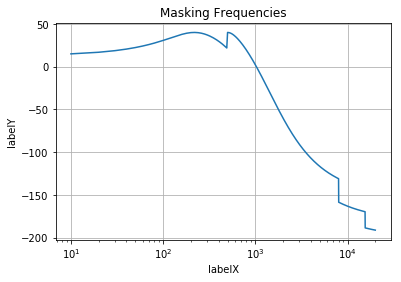

Data written to /tmp/comp28512_9k0956.wav.


<source src="data:audio/wav;base64,UklGRpw+AABXQVZFZm10IBAAAAABAAEA6AMAAEAfAAAIAEAAZGF0YXg+AAAKAAAAAAAAABQAAAAA
AAAAHgAAAAAAAAAoAAAAAAAAADIAAAAAAAAAPAAAAAAAAABGAAAAAAAAAFAAAAAAAAAAWgAAAAAA
AABkAAAAAAAAAG4AAAAAAAAAeAAAAAAAAACCAAAAAAAAAIwAAAAAAAAAlgAAAAAAAACgAAAAAAAA
AKoAAAAAAAAAtAAAAAAAAAC+AAAAAAAAAMgAAAAAAAAA0gAAAAAAAADcAAAAAAAAAOYAAAAAAAAA
8AAAAAAAAAD6AAAAAAAAAAQBAAAAAAAADgEAAAAAAAAYAQAAAAAAACIBAAAAAAAALAEAAAAAAAA2
AQAAAAAAAEABAAAAAAAASgEAAAAAAABUAQAAAAAAAF4BAAAAAAAAaAEAAAAAAAByAQAAAAAAAHwB
AAAAAAAAhgEAAAAAAACQAQAAAAAAAJoBAAAAAAAApAEAAAAAAACuAQAAAAAAALgBAAAAAAAAwgEA
AAAAAADMAQAAAAAAANYBAAAAAAAA4AEAAAAAAADqAQAAAAAAAPQBAAAAAAAA/gEAAAAAAAAIAgAA
AAAAABICAAAAAAAAHAIAAAAAAAAmAgAAAAAAADACAAAAAAAAOgIAAAAAAABEAgAAAAAAAE4CAAAA
AAAAWAIAAAAAAABiAgAAAAAAAGwCAAAAAAAAdgIAAAAAAACAAgAAAAAAAIoCAAAAAAAAlAIAAAAA
AACeAgAAAAAAAKgCAAAAAAAAsgIAAAAAAAC8AgAAAAAAAMYCAAAAAAAA0AIAAAAAAADaAgAAAAAA
AOQCAAAAAAAA7gIAAAAAAAD4AgAAAAAAAAIDAAAAAAAADAMAAAAAAAAWAwAAAAAAACADAAAAAAAA
KgMAAAAAAAA0AwAAAAAAAD4DAAAAAAAASAMAAAAAAABSAwAAAAAAAFwDAAAAAAAAZgMAAAAAAABw
AwAAAAAAAHoDAAAAAAAAhAMAAAAAAACOAwAAAAAAAJgDAAAAAAAAogMAAAAAAACsAwAAAAAAALYD
AAAAAAAAwAMAAAAAAADKAwAAAAAAANQDAAAAAAAA3gMAAAAAAADoAwAAAAAAAPIDAAAAAAAA/AMA
AAAAAAAGBAAAAAAAABAEAAAAAAAAGgQAAAAAAAAkBAAAAAAAAC4EAAAAAAAAOAQAAAAAAABCBAAA
AAAAAEwEAAAAAAAAVgQAAAAAAABgBAAAAAAAAGoEAAAAAAAAdAQAAAAAAAB+BAAAAAAAAIgEAAAA
AAAAkgQAAAAAAACcBAAAAAAAAKYEAAAAAAAAsAQAAAAAAAC6BAAAAAAAAMQEAAAAAAAAzgQAAAAA
AADYBAAAAAAAAOIEAAAAAAAA7AQAAAAAAAD2BAAAAAAAAAAFAAAAAAAACgUAAAAAAAAUBQAAAAAA
AB4FAAAAAAAAKAUAAAAAAAAyBQAAAAAAADwFAAAAAAAARgUAAAAAAABQBQAAAAAAAFoFAAAAAAAA
ZAUAAAAAAABuBQAAAAAAAHgFAAAAAAAAggUAAAAAAACMBQAAAAAAAJYFAAAAAAAAoAUAAAAAAACq
BQAAAAAAALQFAAAAAAAAvgUAAAAAAADIBQAAAAAAANIFAAAAAAAA3AUAAAAAAADmBQAAAAAAAPAF
AAAAAAAA+gUAAAAAAAAEBgAAAAAAAA4GAAAAAAAAGAYAAAAAAAAiBgAAAAAAACwGAAAAAAAANgYA
AAAAAABABgAAAAAAAEoGAAAAAAAAVAYAAAAAAABeBgAAAAAAAGgGAAAAAAAAcgYAAAAAAAB8BgAA
AAAAAIYGAAAAAAAAkAYAAAAAAACaBgAAAAAAAKQGAAAAAAAArgYAAAAAAAC4BgAAAAAAAMIGAAAA
AAAAzAYAAAAAAADWBgAAAAAAAOAGAAAAAAAA6gYAAAAAAAD0BgAAAAAAAP4GAAAAAAAACAcAAAAA
AAASBwAAAAAAABwHAAAAAAAAJgcAAAAAAAAwBwAAAAAAADoHAAAAAAAARAcAAAAAAABOBwAAAAAA
AFgHAAAAAAAAYgcAAAAAAABsBwAAAAAAAHYHAAAAAAAAgAcAAAAAAACKBwAAAAAAAJQHAAAAAAAA
ngcAAAAAAACoBwAAAAAAALIHAAAAAAAAvAcAAAAAAADGBwAAAAAAANAHAAAAAAAA2gcAAAAAAADk
BwAAAAAAAO4HAAAAAAAA+AcAAAAAAAACCAAAAAAAAAwIAAAAAAAAFggAAAAAAAAgCAAAAAAAACoI
AAAAAAAANAgAAAAAAAA+CAAAAAAAAEgIAAAAAAAAUggAAAAAAABcCAAAAAAAAGYIAAAAAAAAcAgA
AAAAAAB6CAAAAAAAAIQIAAAAAAAAjggAAAAAAACYCAAAAAAAAKIIAAAAAAAArAgAAAAAAAC2CAAA
AAAAAMAIAAAAAAAAyggAAAAAAADUCAAAAAAAAN4IAAAAAAAA6AgAAAAAAADyCAAAAAAAAPwIAAAA
AAAABgkAAAAAAAAQCQAAAAAAABoJAAAAAAAAJAkAAAAAAAAuCQAAAAAAADgJAAAAAAAAQgkAAAAA
AABMCQAAAAAAAFYJAAAAAAAAYAkAAAAAAABqCQAAAAAAAHQJAAAAAAAAfgkAAAAAAACICQAAAAAA
AJIJAAAAAAAAnAkAAAAAAACmCQAAAAAAALAJAAAAAAAAugkAAAAAAADECQAAAAAAAM4JAAAAAAAA
2AkAAAAAAADiCQAAAAAAAOwJAAAAAAAA9gkAAAAAAAAACgAAAAAAAAoKAAAAAAAAFAoAAAAAAAAe
CgAAAAAAACgKAAAAAAAAMgoAAAAAAAA8CgAAAAAAAEYKAAAAAAAAUAoAAAAAAABaCgAAAAAAAGQK
AAAAAAAAbgoAAAAAAAB4CgAAAAAAAIIKAAAAAAAAjAoAAAAAAACWCgAAAAAAAKAKAAAAAAAAqgoA
AAAAAAC0CgAAAAAAAL4KAAAAAAAAyAoAAAAAAADSCgAAAAAAANwKAAAAAAAA5goAAAAAAADwCgAA
AAAAAPoKAAAAAAAABAsAAAAAAAAOCwAAAAAAABgLAAAAAAAAIgsAAAAAAAAsCwAAAAAAADYLAAAA
AAAAQAsAAAAAAABKCwAAAAAAAFQLAAAAAAAAXgsAAAAAAABoCwAAAAAAAHILAAAAAAAAfAsAAAAA
AACGCwAAAAAAAJALAAAAAAAAmgsAAAAAAACkCwAAAAAAAK4LAAAAAAAAuAsAAAAAAADCCwAAAAAA
AMwLAAAAAAAA1gsAAAAAAADgCwAAAAAAAOoLAAAAAAAA9AsAAAAAAAD+CwAAAAAAAAgMAAAAAAAA
EgwAAAAAAAAcDAAAAAAAACYMAAAAAAAAMAwAAAAAAAA6DAAAAAAAAEQMAAAAAAAATgwAAAAAAABY
DAAAAAAAAGIMAAAAAAAAbAwAAAAAAAB2DAAAAAAAAIAMAAAAAAAAigwAAAAAAACUDAAAAAAAAJ4M
AAAAAAAAqAwAAAAAAACyDAAAAAAAALwMAAAAAAAAxgwAAAAAAADQDAAAAAAAANoMAAAAAAAA5AwA
AAAAAADuDAAAAAAAAPgMAAAAAAAAAg0AAAAAAAAMDQAAAAAAABYNAAAAAAAAIA0AAAAAAAAqDQAA
AAAAADQNAAAAAAAAPg0AAAAAAABIDQAAAAAAAFINAAAAAAAAXA0AAAAAAABmDQAAAAAAAHANAAAA
AAAAeg0AAAAAAACEDQAAAAAAAI4NAAAAAAAAmA0AAAAAAACiDQAAAAAAAKwNAAAAAAAAtg0AAAAA
AADADQAAAAAAAMoNAAAAAAAA1A0AAAAAAADeDQAAAAAAAOgNAAAAAAAA8g0AAAAAAAD8DQAAAAAA
AAYOAAAAAAAAEA4AAAAAAAAaDgAAAAAAACQOAA

In [202]:
F2=1000
A1dB_SPL = 40 # Power of F1 masker in dB rel to Pref
f = np.arange(1,2000)*10


f1d = f - F1


z1d = 13 * np.arctan(0.00076 * f1d) + 3.5 * np.arctan((f1d / 7500) ** 2) # Barks

SFdB1 = 15.81 + 7.5 * (z1d + 0.474) - 17.5 * np.sqrt(1 + (z1d + 0.474) ** 2)
    
SFdB1 = SFdB1 + A1dB_SPL # Add DBs

plt.semilogx(f,SFdB1) 
plt.grid(True)
plt.title('Masking Frequencies')
plt.xlabel('labelX')
plt.ylabel('labelY')
plt.show()

Audio(f, rate=1000)